### EDA란 무엇인가?
- EDA는 데이터를 분석하거나 모델을 만들기 전에 데이터의 특성을 파악하고, 문제점을 찾고, 패턴이나 관계를 이해하는 과정

### EDA를 왜 하는가? (Why)
- 데이터가 어떤 구조인지(컬럼, 타입 등)를 파악하기 위해
- 결측치(null 값)나 이상치(outlier)가 있는지 확인하기 위해
- 변수 간의 관계(예: 혈압과 나이의 상관관계)를 알아보기 위해
- 데이터 정제, 변환, 모델링의 방향을 정하기 위해

### EDA를 언제 하는가? (When)
- 머신러닝/딥러닝 모델을 만들기 전에 반드시
- 데이터 분석 프로젝트를 시작할 때 가장 먼저

### EDA에서 주로 무엇을 하는가? (What)

- 데이터의 크기(행/열 수), 컬럼 이름, 데이터 타입 확인
- 기초 통계량(평균, 중앙값, 분산 등) 확인
- 결측치(비어있는 데이터) 탐지
- 이상치(outlier) 탐지
- 데이터 시각화 (히스토그램, 상자 그림(boxplot), 산점도(scatter plot), 히트맵(heatmap) 등)
- 변수 간 상관관계 분석

### 어떻게 하는가? (How)

- Python에서는 주로 Pandas, Matplotlib, Seaborn 같은 라이브러리를 사용
- 데이터를 읽고(read_csv) 기본 통계나 그래프를 그려보면서 진행

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sns


In [6]:
df = pd.read_csv("C:/AI_File/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [7]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

Patient_Number: 환자 번호

Blood_Pressure_Abnormality: 혈압 이상 여부

Level_of_Hemoglobin: 헤모글로빈 수치

Genetic_Pedigree_Coefficient: 유전 계수 (가계 유전력 계수)

Age: 나이

BMI: 체질량지수

Sex: 성별

Pregnancy: 임신 여부

Smoking: 흡연 여부

Physical_activity: 신체 활동 수준

salt_content_in_the_diet: 식단의 염분 함량

alcohol_consumption_per_day: 하루 알코올 섭취량

Level_of_Stress: 스트레스 수준

Chronic_kidney_disease: 만성 신장 질환 여부

Adrenal_and_thyroid_disorders: 부신 및 갑상선 장애 여부

In [8]:
df['Blood_Pressure_Abnormality'].value_counts()

0    1013
1     987
Name: Blood_Pressure_Abnormality, dtype: int64

In [9]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [10]:
df.loc[df['Pregnancy'].isnull(), 'Pregnancy'] = 0
df.loc[df['Genetic_Pedigree_Coefficient'].isnull(), 'Genetic_Pedigree_Coefficient'] = 2
mean_alcohol = df['alcohol_consumption_per_day'].mean()
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(mean_alcohol)

print(df.isnull().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


### 카운트플롯(countplot)
- 범주형 데이터의 빈도(개수)를 보여주는 막대그래프

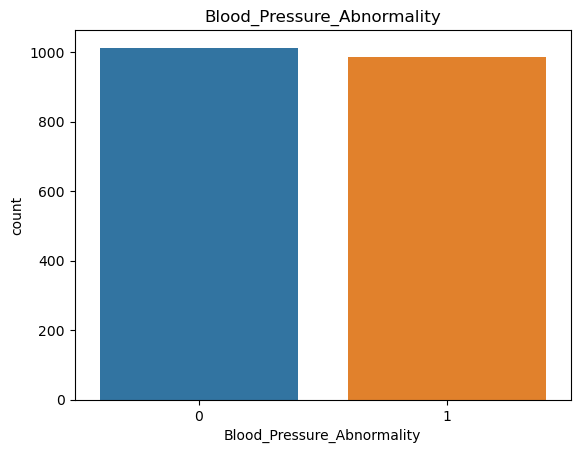

In [11]:
#카운트플롯(countplot)
sns.countplot(data=df, x='Blood_Pressure_Abnormality')
plt.title('Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('count')

plt.show()

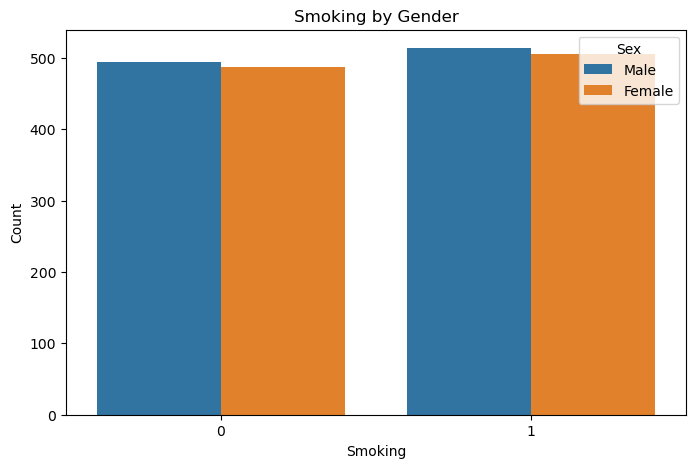

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Smoking', hue='Sex')

plt.title('Smoking by Gender')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])  # assuming 0=Male, 1=Female

plt.show()

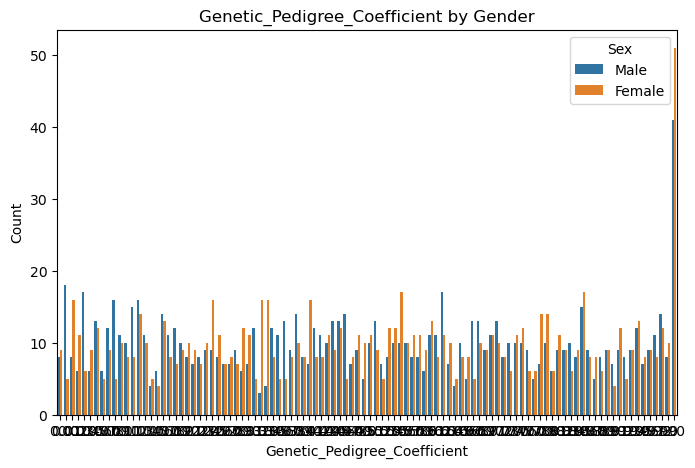

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genetic_Pedigree_Coefficient', hue='Sex')

plt.title('Genetic_Pedigree_Coefficient by Gender')
plt.xlabel('Genetic_Pedigree_Coefficient')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])  # assuming 0=Male, 1=Female

plt.show()

### 박스플롯(Boxplot)
- 수치형 데이터('Physical_activity')의 분포, 중앙값, 이상치(outlier) 등을 시각화하는 그래프

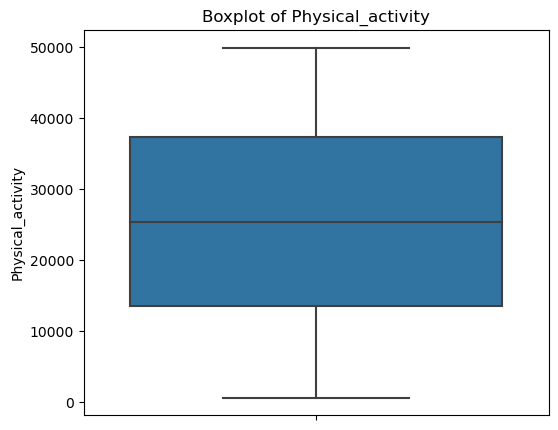

In [14]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Physical_activity'])  
plt.title('Boxplot of Physical_activity')
plt.ylabel('Physical_activity')
#plt.grid(True)
plt.show()


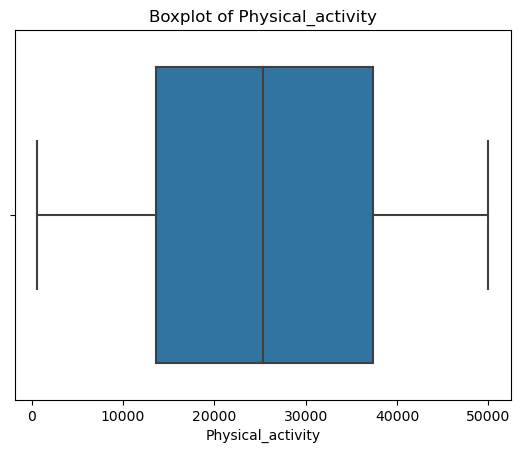

In [15]:
 # 가로 방향
sns.boxplot(x=df['Physical_activity']) 
plt.title('Boxplot of Physical_activity')
plt.xlabel('Physical_activity')
plt.show()


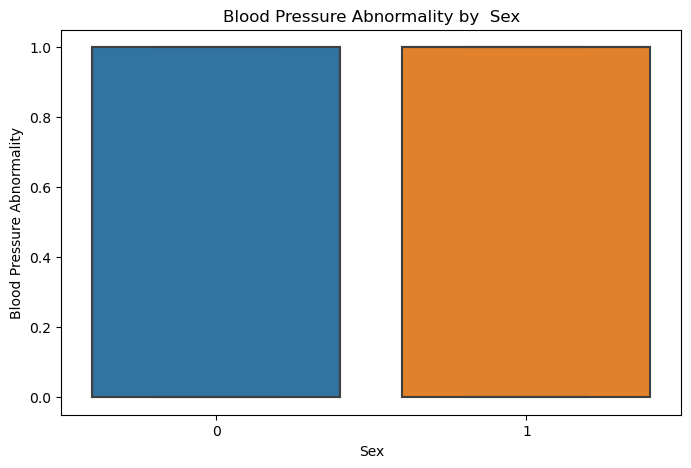

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sex', y='Blood_Pressure_Abnormality')

plt.title('Blood Pressure Abnormality by  Sex')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure Abnormality')
plt.show()

### 바이올린플롯(Violin Plot)
- 박스플롯과 비슷하지만, 데이터의 분포(밀도) 를 더 부드럽게 보여주는 그래프

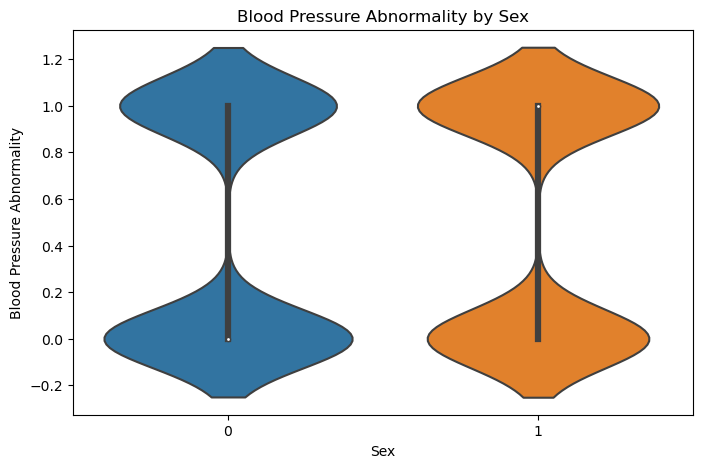

In [17]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x= 'Sex', y='Blood_Pressure_Abnormality')

plt.title('Blood Pressure Abnormality by Sex')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure Abnormality')
plt.show()

### 히트맵(Heatmap)
- 수치형 데이터 간 *상관계수(correlation coefficient)* 를 색깔로 시각화해서
변수들 간의 관계를 한눈에 볼 수 있게 만드는 그래프

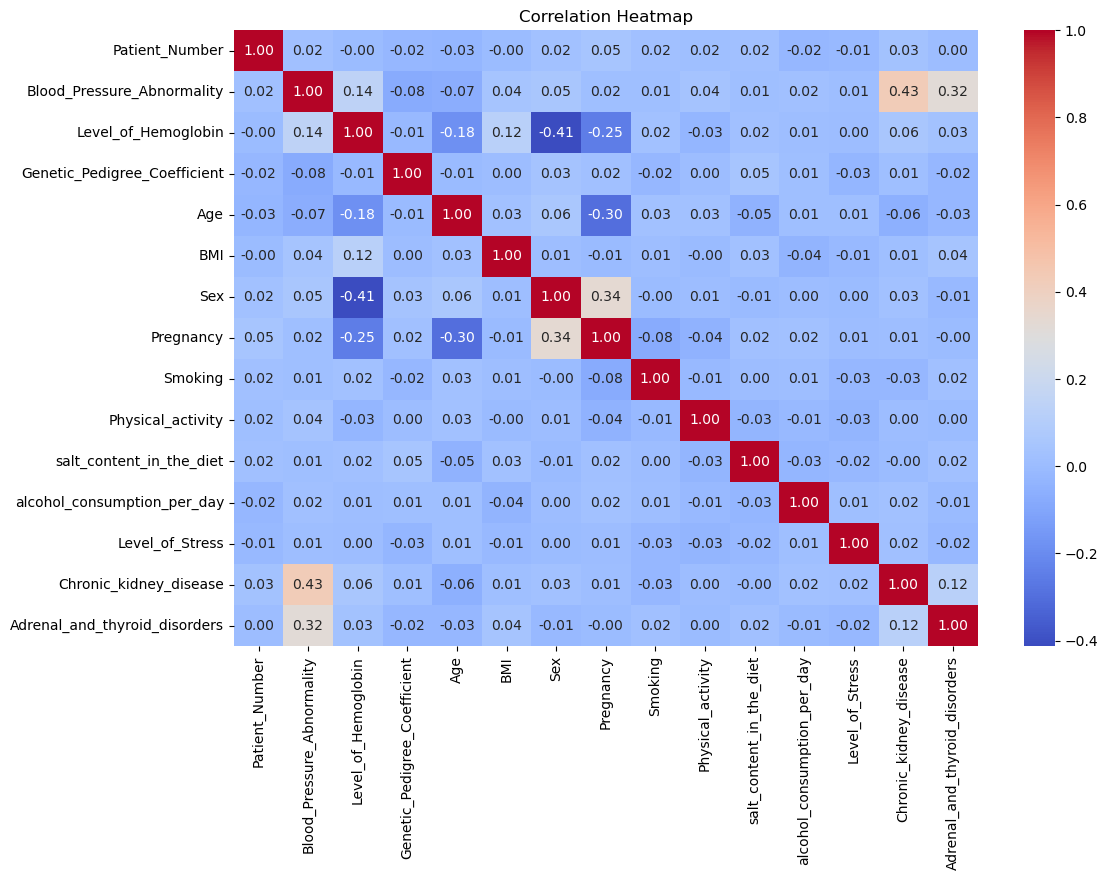

In [18]:

numeric_df = df.select_dtypes(include='number')

# 상관계수 계산
correlation = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

### 히스토그램(Histogram)
- 수치형 데이터(Age)의 분포를 구간별로 나누어 막대 형태로 표현한 그래프

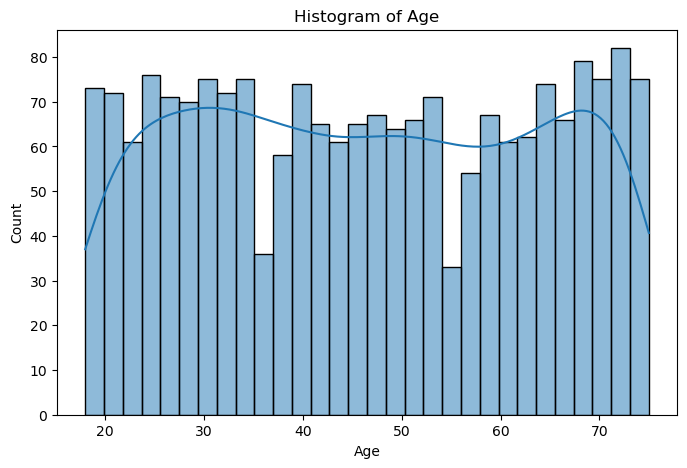

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=30)

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

### KDE 플롯(Kernel Density Estimation Plot)
- 수치형 데이터(Genetic_Pedigree_Coefficient)의 분포를 부드러운 곡선으로 나타낸 그래프

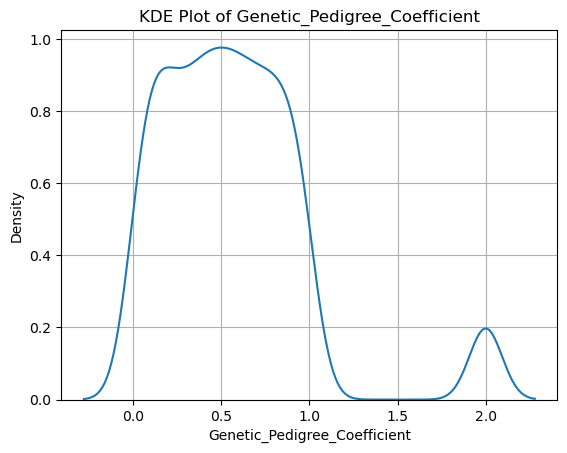

In [20]:
sns.kdeplot(data=df, x='Genetic_Pedigree_Coefficient')
plt.title('KDE Plot of Genetic_Pedigree_Coefficient')
plt.xlabel('Genetic_Pedigree_Coefficient')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### 라인플롯(Line Plot)
- 연속형 변수(Age)에 따른 다른 변수(Blood Pressure Abnormality, BMI)의 평균 변화를 선으로 나타낸 그래프

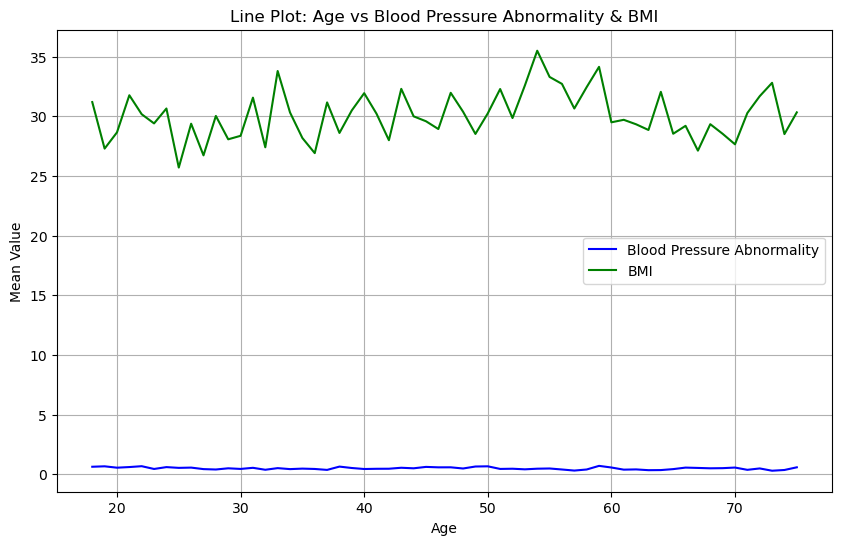

In [21]:
age_grouped = df.groupby('Age')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x='Age', y='Blood_Pressure_Abnormality', label='Blood Pressure Abnormality', color='blue')
sns.lineplot(data=age_grouped, x='Age', y='BMI', label='BMI', color='green')

plt.title('Line Plot: Age vs Blood Pressure Abnormality & BMI')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()


### 디스트리뷰션 플롯(Distribution Plot)
- 데이터(Genetic_Pedigree_Coefficient)의 분포를 히스토그램 + KDE로 함께 시각화하는 그래프

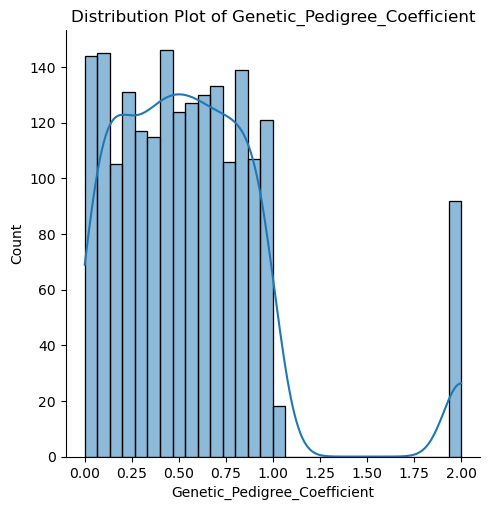

In [22]:
sns.displot(data=df, x='Genetic_Pedigree_Coefficient', kde=True, bins=30)
plt.title('Distribution Plot of Genetic_Pedigree_Coefficient')  
plt.show()

### 산점도(Scatter Plot)
- 두 연속형 변수 간의 관계를 점으로 시각화한 그래프

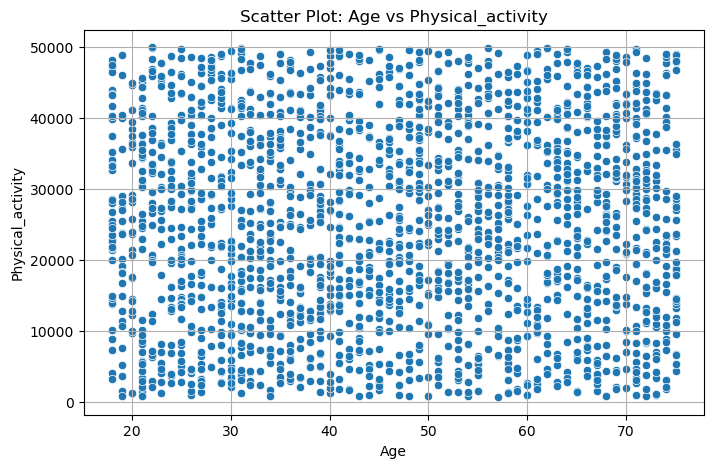

In [23]:


plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Physical_activity')

plt.title('Scatter Plot: Age vs Physical_activity')
plt.xlabel('Age')
plt.ylabel('Physical_activity')
plt.grid(True)
plt.show()


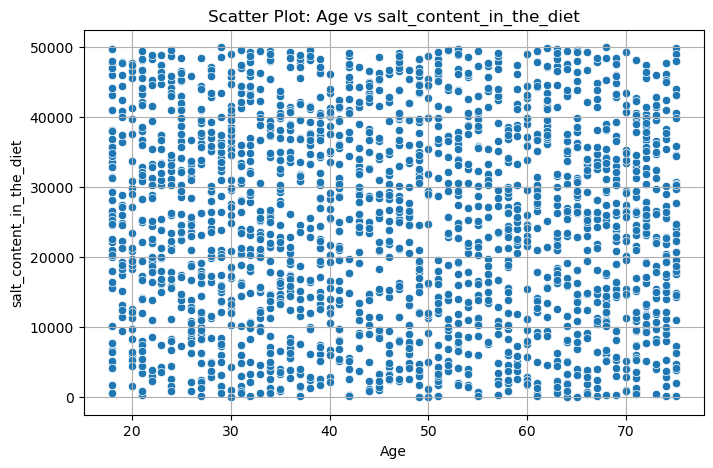

In [24]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='salt_content_in_the_diet')

plt.title('Scatter Plot: Age vs salt_content_in_the_diet')
plt.xlabel('Age')
plt.ylabel('salt_content_in_the_diet')
plt.grid(True)
plt.show()


### 분류모델 

In [25]:
target_column = "Blood_Pressure_Abnormality"  
X = df.drop(columns=[target_column]).values
y = df[target_column].values

In [26]:
# 데이터 분할 및 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [28]:
# Convert to PyTorch tensors
# Convert to PyTorch tensors (이진 분류용으로 수정)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [29]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [31]:
class BPdataDense(nn.Module):
    def __init__(self):
        super(BPdataDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) 
    #x = torch.sigmoid(self.fc3(x))  # 다중 클래스  x = self.fc3(x) 
        return x

# Initialize the model, loss function, and optimizer
model = BPdataDense()

In [32]:
#criterion = nn.BCELoss() 
criterion = nn.BCEWithLogitsLoss()   #이진클래스 sigmoid를 안 쓸때
# 다중 클래스 CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [33]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).int()

        # 레이블도 int로 맞추고 shape 맞추기
            labels = labels.int()
        
            correct += (predicted.view(-1) == labels.view(-1)).sum().item()
            total += labels.size(0)

            accuracy = 100 * correct / total

    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.5582, Accuracy: 77.50%
Epoch 2/20, Loss: 0.4716, Accuracy: 79.25%
Epoch 3/20, Loss: 0.4341, Accuracy: 77.25%
Epoch 4/20, Loss: 0.4093, Accuracy: 79.50%
Epoch 5/20, Loss: 0.3715, Accuracy: 80.75%
Epoch 6/20, Loss: 0.3605, Accuracy: 82.50%
Epoch 7/20, Loss: 0.3364, Accuracy: 83.50%
Epoch 8/20, Loss: 0.2978, Accuracy: 82.75%
Epoch 9/20, Loss: 0.2890, Accuracy: 81.25%
Epoch 10/20, Loss: 0.2708, Accuracy: 85.25%
Epoch 11/20, Loss: 0.2638, Accuracy: 83.00%
Epoch 12/20, Loss: 0.2768, Accuracy: 82.25%
Epoch 13/20, Loss: 0.2415, Accuracy: 83.00%
Epoch 14/20, Loss: 0.2195, Accuracy: 82.75%
Epoch 15/20, Loss: 0.2163, Accuracy: 83.50%
Epoch 16/20, Loss: 0.2148, Accuracy: 84.50%
Epoch 17/20, Loss: 0.1933, Accuracy: 85.00%
Epoch 18/20, Loss: 0.1807, Accuracy: 85.50%
Epoch 19/20, Loss: 0.1679, Accuracy: 84.75%
Epoch 20/20, Loss: 0.1477, Accuracy: 83.25%
Training complete.


In [34]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).int()  # 확률이 0.5 초과이면 1로 예측
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())


# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[198  25]
 [ 42 135]]
F1 Score: 0.83
Precision: 0.83
Recall: 0.83
Specificity: 0.83


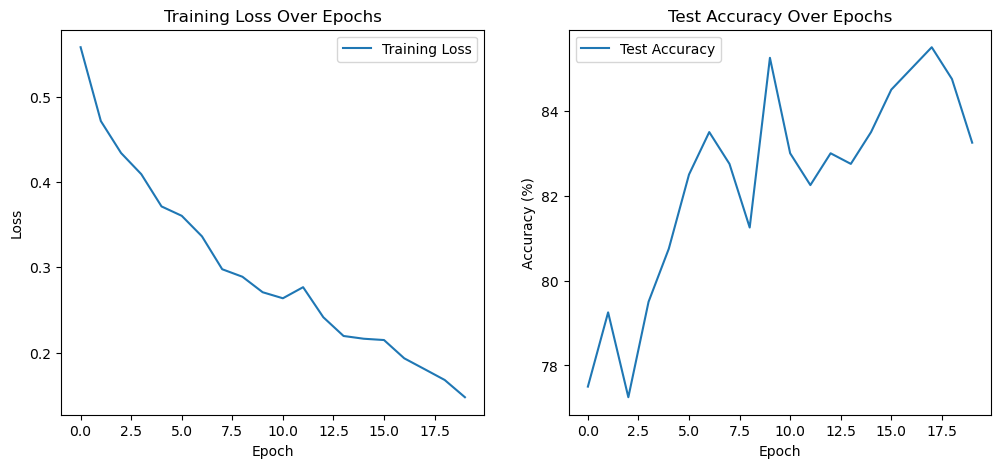

In [35]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()